In [23]:
import os

def save_fig(fig_id, tight_layout=True):
    path = os.path.join("images", fig_id + ".png")
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format='png', dpi=300)

# Perceptron

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
# sns.set(style='darkgrid')

# Increase the plot size and font size.
# sns.set(font_scale=1.5)
# plt.rcParams["figure.figsize"] = (12,6)

plt.plot([0.2,0.3], 'b-o', label="separating line")
plt.scatter(0, 0)
plt.scatter(0, 1)
plt.scatter(1, 0)

plt.text(0,0,'decent but dull')# Label the plot.
plt.text(0,1,'fun and nimble')# Label the plot.
plt.text(1,0,'too bad')# Label the plot.

plt.title("Separating curve")
plt.xlabel("bad")
plt.ylabel("fun")
plt.legend()

plt.show()


# Linearly Separable Classes

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

data = pd.read_csv('data/linearbly_separable_clusters.csv', header=None)
X = data[[0,1]].values
y = data[2]

print(len(X),len(y))
print(X[0])

100 100
[1.4 0.2]


In [26]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(-0.3930114751389817, array([0.25021329, 0.22538328]))

## Curve hand-crafted

Saving figure linearly_separable_classes


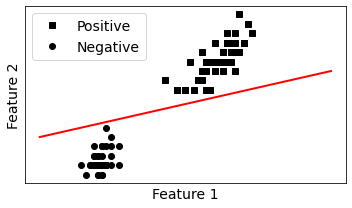

In [107]:
x0 = np.linspace(0, 7, 200)
# pred_1 = 5*x0 - 20
# pred_2 = x0 - 1.9
pred_3 = 0.1 * x0 + 0.5

plt.figure(figsize=(5,3))

# plt.subplot(121)
# plt.plot(x0, pred_1, "g--", linewidth=2)
# plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ks", label="Positive")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ko", label="Negative")
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
# plt.axis([0, 5.5, 0, 2])
plt.xticks([])
plt.yticks([])

save_fig("linearly_separable_classes")
plt.show()

## trying to draw curve from the linear regression parameters

x [[0. 1.]
 [3. 1.]] y [-0.16762819  0.58301167]
[0. 3.] [-0.39301148  0.35762839]


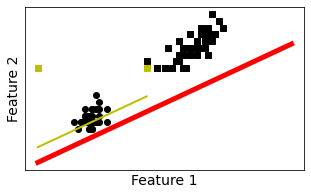

In [221]:
# Dois novo pontos
xx = np.ndarray(shape=(2,2))
xx[0,0]=0
xx[0,1]=1
xx[1,0]=3
xx[1,1]=1

# predicted y for x_test
yy = lin_reg.predict(xx)
# print('xx',xx)
print('x',xx[:],'y', yy[:])

x0 = np.linspace(0, 7, 200)

# pred_1 = 5*x0 - 20
# pred_2 = x0 - 1.9
pred_3 = 0.25021329 * x0 + -0.3930114751389817

novos_pred = 0.25021329 * xx[:,0] + -0.3930114751389817
print(xx[:,0], novos_pred)

plt.figure(figsize=(5,3))

plt.plot(xx[:,0], xx[:,1], "ys", label="a")
# plt.plot(xx[:][0], x_test[1][1], "bs", label="b")

plt.plot(X[:, 0][y==1], X[:, 1][y==1], "ks", label="Positive")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "ko", label="Negative")

plt.plot(x0, pred_3, "r-", linewidth=5)
plt.plot(xx[:,0], novos_pred, "y-", linewidth=2)


plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
# plt.legend(loc="upper left", fontsize=14)
# plt.axis([0, 5.5, 0, 2])
plt.xticks([])
plt.yticks([])

# save_fig("linearly_separable_classes")
plt.show()

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print(X[0])
print(X_poly[0])



In [ ]:
x_t = []
for i in X:
    x_t.append(i[0])

In [ ]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_t = lin_reg.predict(X)
# print(y_t)

plt.plot(x_t, y_t, "r-", linewidth=2)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
# plt.axis([0, 5.5, 0, 2])
plt.xticks([])
plt.yticks([])

# save_fig("linearly_separable_classes")
plt.show()

In [ ]:
import operator

import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures

np.random.seed(0)
x = 2 - 3 * np.random.normal(0, 1, 20)
y = x - 2 * (x ** 2) + 0.5 * (x ** 3) + np.random.normal(-3, 3, 20)

# transforming the data to include another axis
x = x[:, np.newaxis]
y = y[:, np.newaxis]

polynomial_features= PolynomialFeatures(degree=2)
x_poly = polynomial_features.fit_transform(x)

model = LinearRegression()
model.fit(x_poly, y)
y_poly_pred = model.predict(x_poly)

rmse = np.sqrt(mean_squared_error(y,y_poly_pred))
r2 = r2_score(y,y_poly_pred)
print(rmse)
print(r2)

plt.scatter(x, y, s=10)
# sort the values of x before line plot
sort_axis = operator.itemgetter(0)
sorted_zip = sorted(zip(x,y_poly_pred), key=sort_axis)
x, y_poly_pred = zip(*sorted_zip)
plt.plot(x, y_poly_pred, color='m')
plt.show()

No handles with labels found to put in legend.


-0.46206600489669447 [0.33626914]


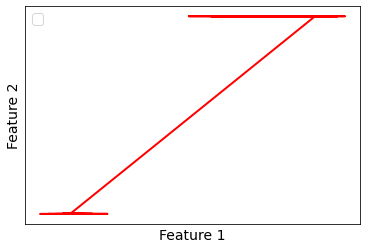

In [22]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()

# print(X)
# xt = np.zeros([100,1])
# print(xt)

i=0
for x in X:
    xt[i] = x[0]
    i=i+1
    
lin_reg.fit(xt,y)
print(lin_reg.intercept_, lin_reg.coef_)
yt = lin_reg.predict(xt)

plt.plot(xt, y, "r-", linewidth=2)
plt.xlabel("Feature 1", fontsize=14)
plt.ylabel("Feature 2", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
# plt.axis([0, 5.5, 0, 2])
plt.xticks([])
plt.yticks([])

# save_fig("linearly_separable_classes")
plt.show()

In [10]:
print(X[0])

[1.4 0.2]
